# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

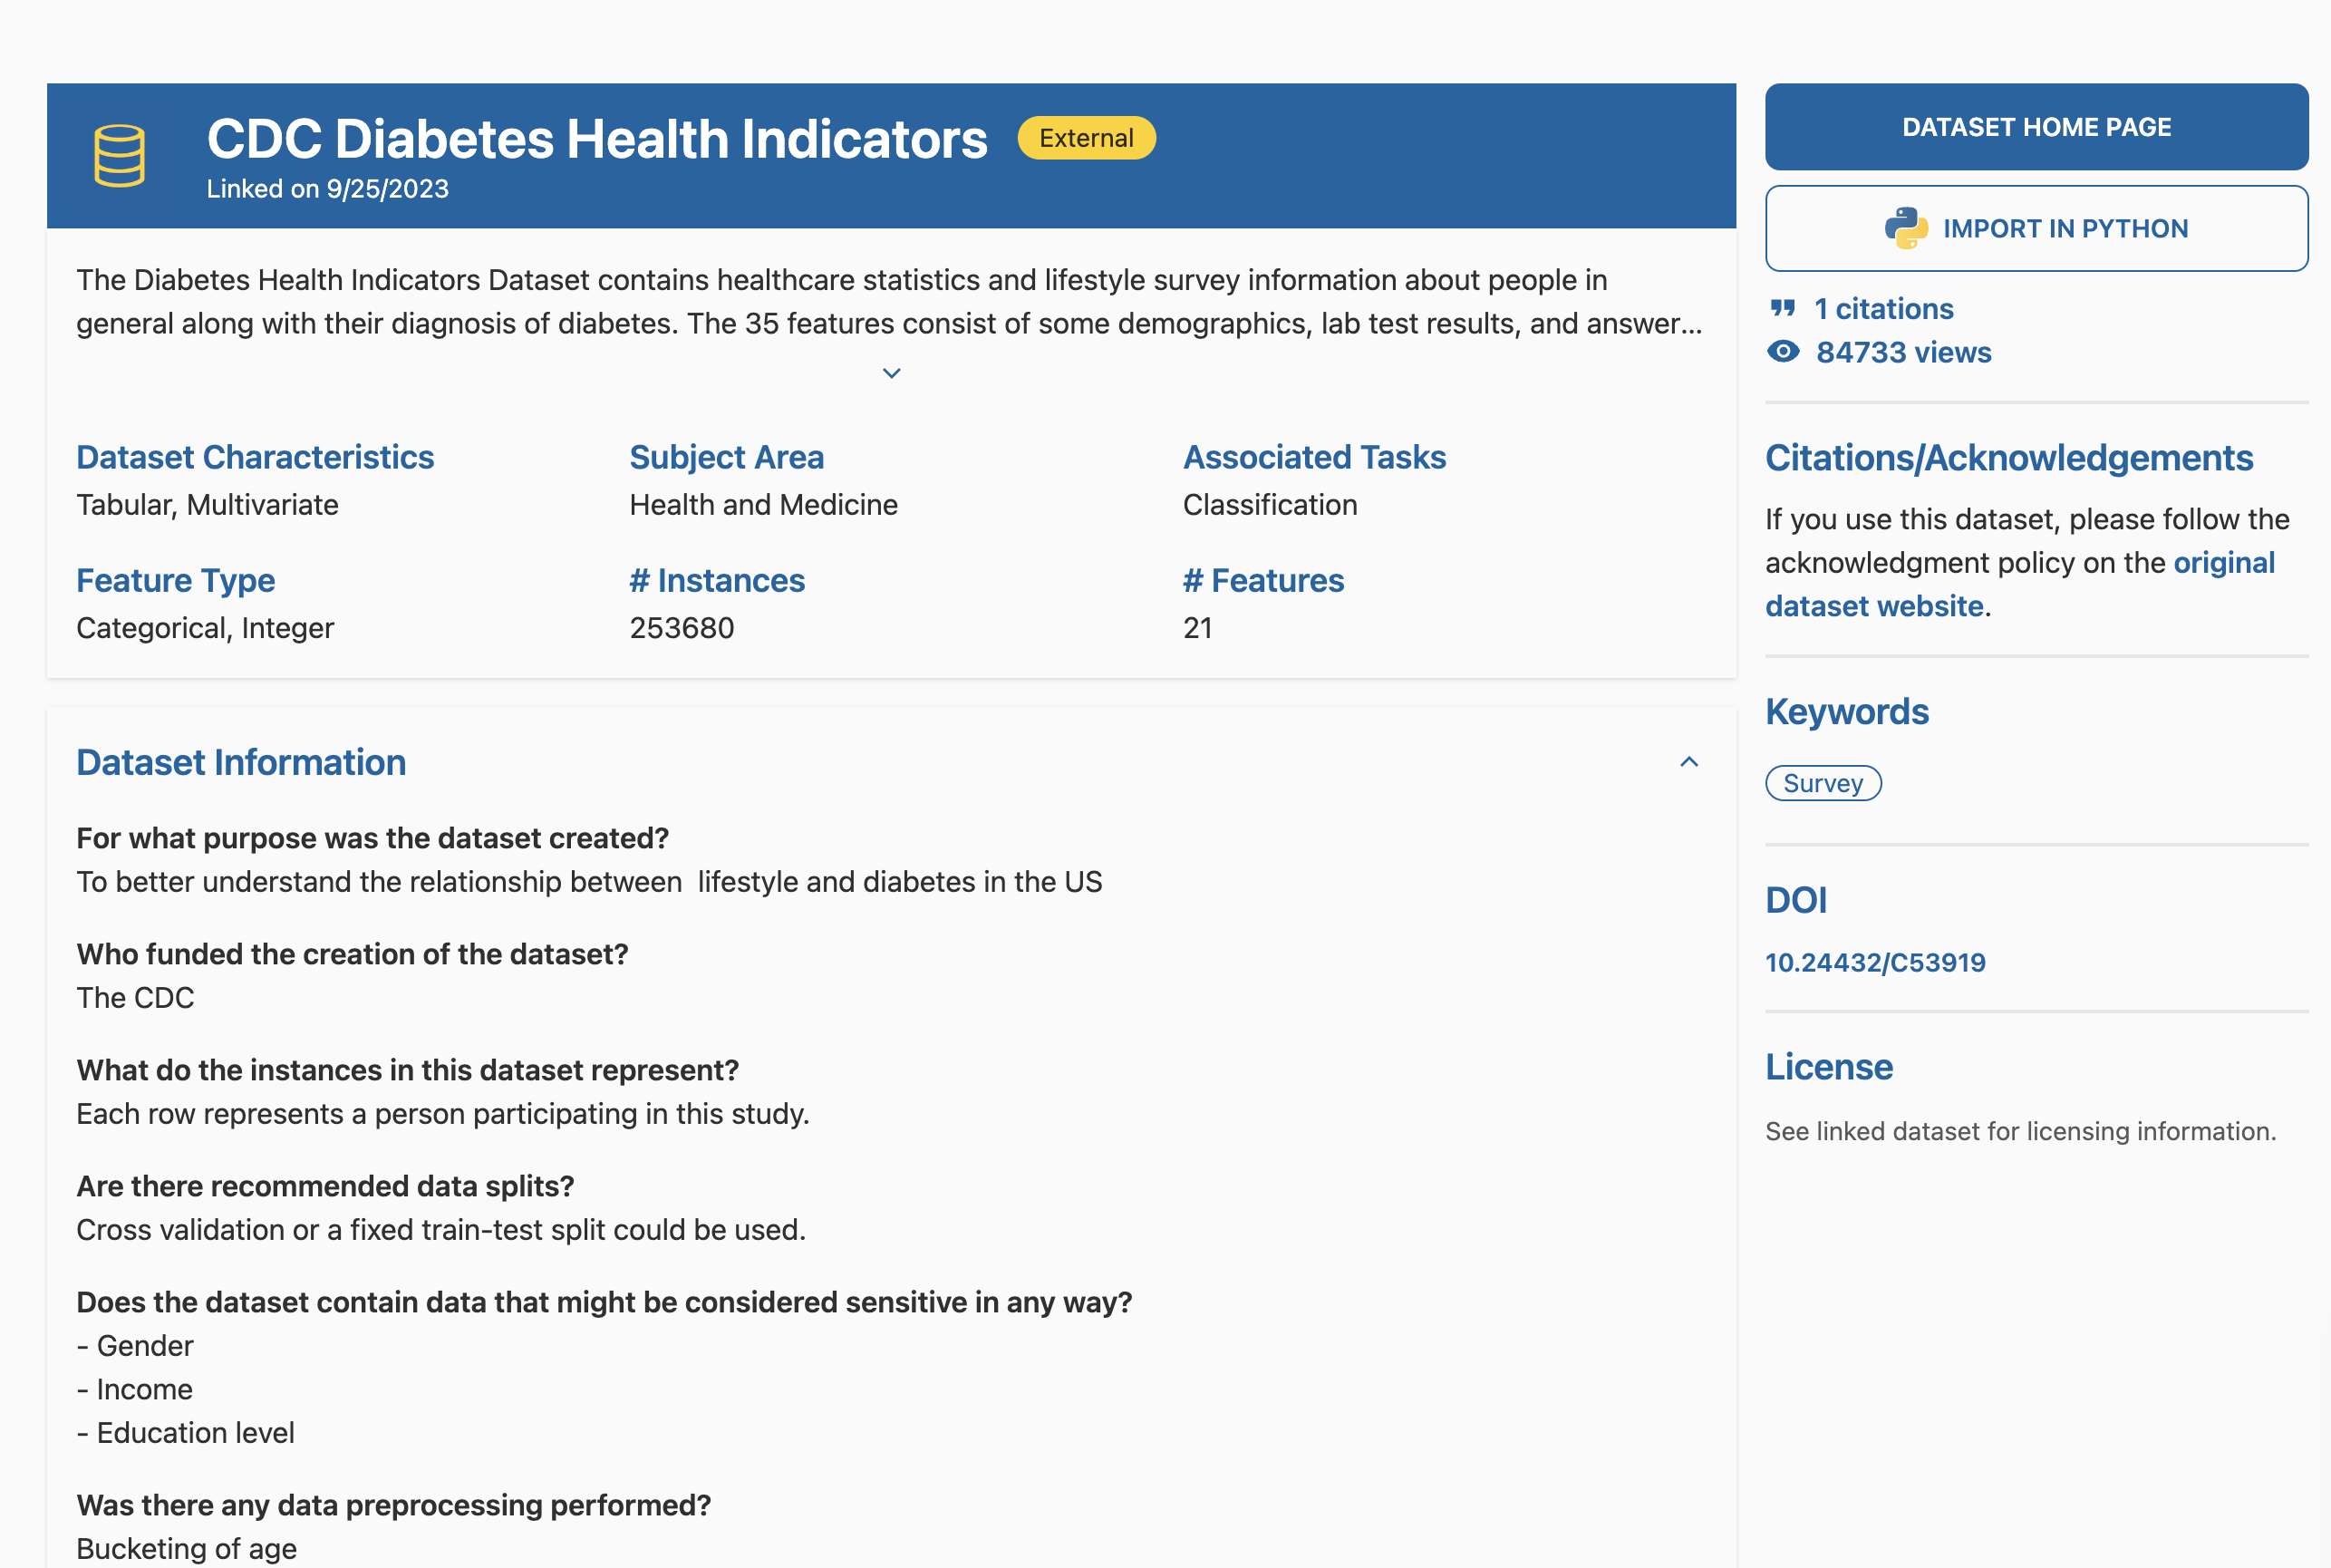

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the article, there were **17 campaigns** between **May 2008** and **Nov 2010**. These **phone campaings** focused on offered **long-term deposits** with **good interest rates**. The **success** was determined if the **customer subscribed to the long-term deposits**.

From the article:
"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored (e.g. see Table 2) and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate)." 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import plotly.graph_objs as go
from plotly.subplots import make_subplots

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load Data for analysis

In [2]:
# Import the dataset into the Jupyter Notebook Project

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
# variable information 

cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


### Understanding the Data

In [4]:
with pd.option_context('display.max_colwidth', None):
  display(cdc_diabetes_health_indicators.variables.description)

0                                                                                                                                                                                                                                                                                                                                  Patient ID
1                                                                                                                                                                                                                                                                                                 0 = no diabetes 1 = prediabetes or diabetes
2                                                                                                                                                                                                                                                                                                                  0 = no high BP 1 = high B

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [6]:
print (f'Total # of Rows: {X.shape[0]:,} and Total # of Columns: {X.shape[1]}')

Total # of Rows: 253,680 and Total # of Columns: 21


In [7]:
# Since all the attributes are numeric data, let's explore the statistical information for each of the attribute

X.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [8]:
# Let's look at the first 10 rows of the dataset
# Since there are 21 columns, I will transpose the data to display the data 
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
HighBP,1,0,1,1,1,1,1,1,1,0
HighChol,1,0,1,0,1,1,0,1,1,0
CholCheck,1,0,1,1,1,1,1,1,1,1
BMI,40,25,28,27,24,25,30,25,30,24
Smoker,1,1,0,0,0,1,1,1,1,0
Stroke,0,0,0,0,0,0,0,0,0,0
HeartDiseaseorAttack,0,0,0,0,0,0,0,0,1,0
PhysActivity,0,1,0,1,1,1,0,1,0,0
Fruits,0,0,1,1,1,1,0,0,1,0
Veggies,1,0,0,1,1,1,0,1,1,1


In [9]:
# Let's look at the last 10 rows of the dataset
X.tail(10).T

,253670,253671,253672,253673,253674,253675,253676,253677,253678,253679
HighBP,1,1,1,1,0,1,1,0,1,1
HighChol,1,1,0,0,0,1,1,0,0,1
CholCheck,1,1,1,1,1,1,1,1,1,1
BMI,25,23,30,42,27,45,18,28,23,25
Smoker,0,0,1,0,0,0,0,0,0,0
Stroke,0,1,0,0,0,0,0,0,0,0
HeartDiseaseorAttack,1,1,1,0,0,0,0,0,0,1
PhysActivity,0,0,1,1,0,0,0,1,0,1
Fruits,1,0,1,1,0,1,0,1,1,1
Veggies,0,0,1,1,1,1,0,0,1,0


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Diabetes_binary  253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [11]:
y.Diabetes_binary.unique()

array([0, 1])

In [12]:
# List the count of unique values for each column
# If column has less than 15 unique values, display them in sorted order

for col in X.columns:
    print (f'{col:<20} : {X[col].nunique():2} unique values.', end = ' ')
    print ('They are :', sorted(X[col].unique())) if (X[col].nunique() < 15) else print()

HighBP               :  2 unique values. They are : [0, 1]
HighChol             :  2 unique values. They are : [0, 1]
CholCheck            :  2 unique values. They are : [0, 1]
BMI                  : 84 unique values. 
Smoker               :  2 unique values. They are : [0, 1]
Stroke               :  2 unique values. They are : [0, 1]
HeartDiseaseorAttack :  2 unique values. They are : [0, 1]
PhysActivity         :  2 unique values. They are : [0, 1]
Fruits               :  2 unique values. They are : [0, 1]
Veggies              :  2 unique values. They are : [0, 1]
HvyAlcoholConsump    :  2 unique values. They are : [0, 1]
AnyHealthcare        :  2 unique values. They are : [0, 1]
NoDocbcCost          :  2 unique values. They are : [0, 1]
GenHlth              :  5 unique values. They are : [1, 2, 3, 4, 5]
MentHlth             : 31 unique values. 
PhysHlth             : 31 unique values. 
DiffWalk             :  2 unique values. They are : [0, 1]
Sex                  :  2 unique values

### Key values for each of the Binary Attributes
```
Target Variable: 

Diabetes_binary (y)   0 = no diabetes
                      1 = prediabetes or diabetes

Input Variables:

HighBP                0 = no high BP
                      1 = high BP

HighChol              0 = no high cholesterol
                      1 = high cholesterol

CholCheck             0 = no cholesterol check in 5 years
                      1 = yes cholesterol check in 5 years

Smoker                Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
                      0 = no
                      1 = yes

Stroke                (Ever told) you had a stroke
                      0 = no
                      1 = yes 

HeartDiseaseorAttack  Coronary Heart Disease (CHD) or Myocardial Infarction (MI)
                      0 = no
                      1 = yes 

PhysActivity          Physical activity in past 30 days - not including job
                      0 = no
                      1 = yes 

Fruits                Consume Fruit 1 or more times per day
                      0 = no
                      1 = yes 

Veggies               Consume Vegetables 1 or more times per day
                      0 = no
                      1 = yes 

HvyAlcoholConsump     Heavy drinkers (adult men having more than 14 drinks per week and
                                      adult women having more than 7 drinks per week)
                      0 = no
                      1 = yes 

AnyHealthcare         Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
                      0 = no
                      1 = yes 

NoDocbcCost           Was there a time in the past 12 months when you needed to see a doctor
                      but could not because of cost?
                      0 = no
                      1 = yes

DiffWalk              Do you have serious difficulty walking or climbing stairs?
                      0 = no
                      1 = yes 

Sex                   0 = female
                      1 = male
```

### Key values for each of the Numeric Attributes with Range of Values

```
GenHlth               Would you say that in general your health is: scale 1-5
                      1 = excellent
                      2 = very good
                      3 = good
                      4 = fair
                      5 = poor

Age                   13-level age category (_AGEG5YR see codebook)
                      1  = 18-24
                      2  = 25-29
                      3  = 30-34
                      4  = 35-39
                      5  = 40-44
                      6  = 45-49
                      7  = 50-54
                      8  = 55-59
                      9  = 60-64
                      10 = 65-69
                      11 = 70-74
                      12 = 75-79
                      13 = 80 or older

Education             Education level (EDUCA see codebook) scale 1-6
                      1 = Never attended school or only kindergarten
                      2 = Grades 1 through 8 (Elementary)
                      3 = Grades 9 through 11 (Some high school)
                      4 = Grade 12 or GED (High school graduate)
                      5 = College 1 year to 3 years (Some college or technical school)
                      6 = College 4 years or more (College graduate)  

Income                Income scale (INCOME2 see codebook) scale 1-8
                      1 = less than $10,000
                      2 = less than $15,000
                      3 = less than $20,000
                      4 = less than $25,000
                      5 = less than $35,000
                      6 = less than $50,000
                      7 = less than $75,000
                      8 = $75,000 or more

```

Refer to pages 23 (for Income) and 108 (for Age) in the link below \
https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf

### Data Analysis and Data Visualization 

In [13]:
# Let's visualize each of the attributes using the pie plot to see how they are distributed

#### HighBP - Attribute to evaluate if Patient has High BP
A value of 0 = No High BP, a value of 1 = High BP

In [14]:
# First, summarize the High BP column and calculate the % of data split between the two values 
# (0 and 1 - No High BP and High BP)

grouped_v = X.groupby(['HighBP'])['HighBP'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

HighBP
0    57.09989
1    42.90011
Name: HighBP, dtype: float64

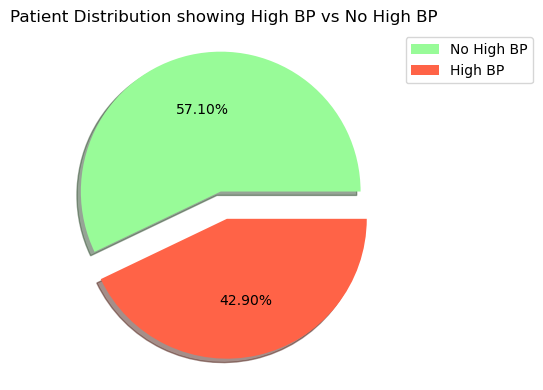

In [15]:
# Next is to visualizing the High BP attribute

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = ['No High BP', 'High BP'],
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='best')
plt.title('Patient Distribution showing High BP vs No High BP')
plt.tight_layout()
plt.show()

#### HighChol - Attribute to evaluate if Patient has High Cholesterol
A value of 0 = No High Cholesterol, a value of 1 = High Cholesterol

In [16]:
# First, summarize the High Cholesterol column and calculate the % of data split between the two values 
# (0 and 1 - No High Cholesterol and High Cholesterol)

grouped_v = X.groupby(['HighChol'])['HighChol'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

HighChol
0    57.587906
1    42.412094
Name: HighChol, dtype: float64

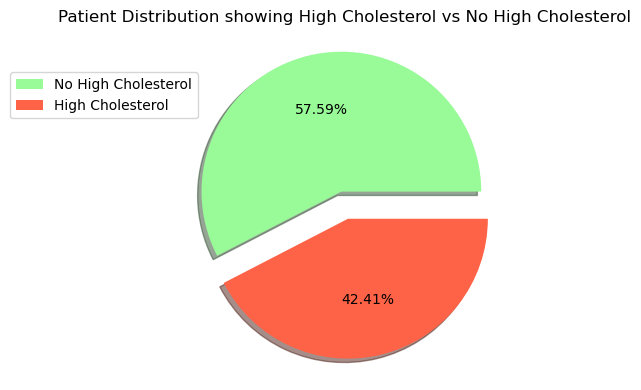

In [17]:
# Next is to visualizing the High Cholesterol attribute

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = ['No High Cholesterol', 'High Cholesterol'],
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(0.1, 0.9),loc='upper right')
plt.title('Patient Distribution showing High Cholesterol vs No High Cholesterol')
plt.tight_layout()
plt.show()

#### CholCheck - Attribute to evaluate if Patient has done a Cholesterol Check in the past 5 years
A value of 0 = Did not do a Cholesterol Check in last 5 years, a value of 1 = Did a Cholesterol Check in last 5 years

In [18]:
# First, summarize the High Cholesterol column and calculate the % of data split between the two values 
# (0 and 1 - No Cholesterol Check in last 5 years and Did Cholesterol Check in last 5 years)

grouped_v = X.groupby(['CholCheck'])['CholCheck'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

CholCheck
0     3.73305
1    96.26695
Name: CholCheck, dtype: float64

In [19]:
# Convert the Index values into meaningful values
cc_label = grouped_v.index.map({0:'No Cholestrol Check in last 5 years',
                               1:'Cholestrol Check in last 5 years'}).to_list()
cc_label

['No Cholestrol Check in last 5 years', 'Cholestrol Check in last 5 years']

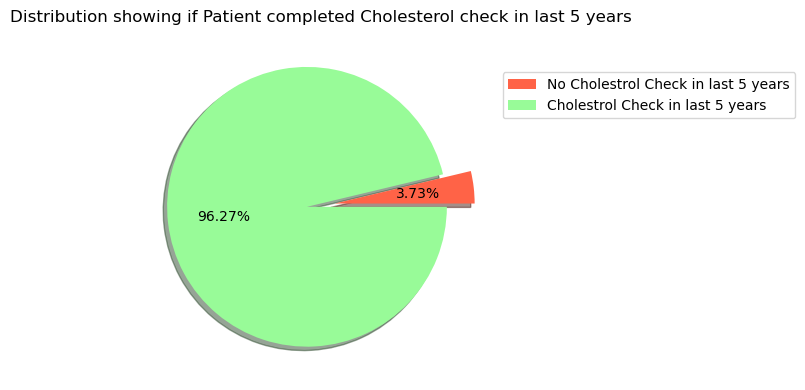

In [20]:
# Next is to visualizing the attribute for Cholesterol Check for last 5 years

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  #labels = ['No Cholestrol Check in last 5 years', 'Cholestrol Check in last 5 years'],
                  labels = cc_label,
                  colors = ['tomato','palegreen'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing if Patient completed Cholesterol check in last 5 years')
plt.tight_layout()
plt.show()

#### Smoker - Attribute to evaluate if Patient has smoked at least 100 cigarettes in their entire life

[Note: 5 packs = 100 cigarettes]

A value of 0 = incdicates they are not considered a Smoker, a value of 1 = indicates they have smoked 100 cigarettes and considered a Smoker

In [21]:
# First, summarize the Smoker column and calculate the % of data split between the two values 
# (0 and 1 - No Cholesterol Check in last 5 years and Did Cholesterol Check in last 5 years)

grouped_v = X.groupby(['Smoker'])['Smoker'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

Smoker
0    55.683144
1    44.316856
Name: Smoker, dtype: float64

In [22]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'Not a Smoker',1:'Smoker'}).to_list()
label_v

['Not a Smoker', 'Smoker']

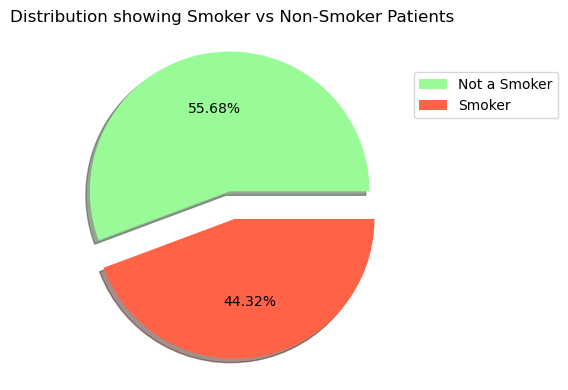

In [23]:
# Next is to visualizing the attribute if Patient is a Smoker

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Smoker vs Non-Smoker Patients')
plt.tight_layout()
plt.show()

#### Stroke - Attribute checks if Patient has ever had a Stoke in the past
A value of 0 = has not had a Stroke in the past, a value of 1 = has had a Stoke in the past

In [24]:
# First, summarize the Stroke column and calculate the % of data split between the two values 
# (0 and 1 - Has NOT had Stroke and Had Stroke)

grouped_v = X.groupby(['Stroke'])['Stroke'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

Stroke
0    95.94292
1     4.05708
Name: Stroke, dtype: float64

In [25]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'Has Not had a Stroke',1:'Had a Stroke'}).to_list()
label_v

['Has Not had a Stroke', 'Had a Stroke']

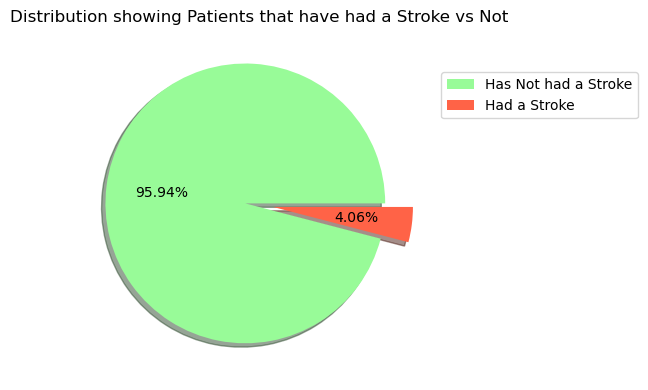

In [26]:
# Next is to visualizing the attribute if Patient is has had a Stroke

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients that have had a Stroke vs Not')
plt.tight_layout()
plt.show()

#### HeartDiseaseorAttack - Attribute checks if Patient has been diagnosed having Coronary Heart Disease (CHD) or Myocardial Infarction (MI)
A value of 0 = has not had a Heart Disease or Attack, a value of 1 = has had a Heart Disease or Attack in the past

In [27]:
# First, summarize the HeartDiseaseorAttack column and calculate the % of data split between the two values 
# (0 and 1 - Has NOT had Heart Disease or Attack and Had Heart Disease or Attack)

grouped_v = X.groupby(['HeartDiseaseorAttack'])['HeartDiseaseorAttack'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

HeartDiseaseorAttack
0    90.581441
1     9.418559
Name: HeartDiseaseorAttack, dtype: float64

In [28]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'Has Not had a Heart Disease or Attack',1:'Had a Heart Disease or Attack'}).to_list()
label_v

['Has Not had a Heart Disease or Attack', 'Had a Heart Disease or Attack']

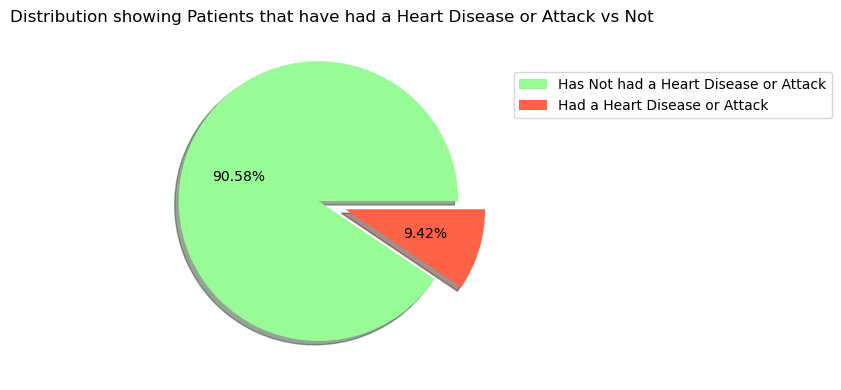

In [29]:
# Next is to visualizing the attribute if Patient has had a Heart Discease or Heart Attack

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  colors = ['palegreen','tomato'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients that have had a Heart Disease or Attack vs Not')
plt.tight_layout()
plt.show()

#### PhysActivity - Attribute checks if Patient has had any Physical Activity in the past 30 days (not including job)
A value of 0 = has not had any Physical Activity, a value of 1 = has had a Physical Activity in past 30 days

In [30]:
# First, summarize the PhysActivity column and calculate the % of data split between the two values 
# (0 and 1 - Has NOT had any Physical Activity and Had Physical Activity)

grouped_v = X.groupby(['PhysActivity'])['PhysActivity'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

PhysActivity
0    24.345632
1    75.654368
Name: PhysActivity, dtype: float64

In [31]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({0:'No Physical Activity',1:'Had Physical Activity'}).to_list()
label_v

['No Physical Activity', 'Had Physical Activity']

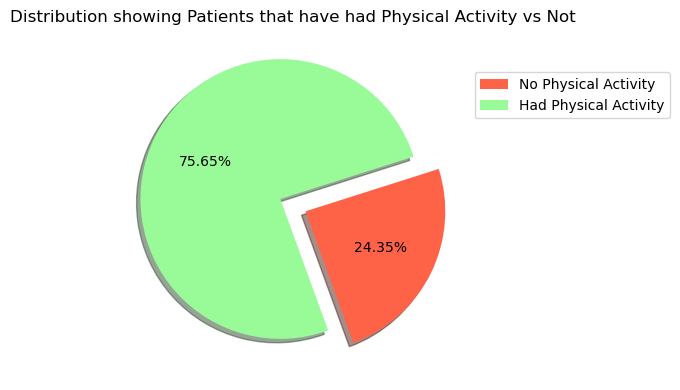

In [32]:
# Next is to visualizing the attribute if Patient is a Smoker

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  startangle=290,
                  colors = ['tomato', 'palegreen'],
                  shadow=True, explode=[0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patients that have had Physical Activity vs Not')
plt.tight_layout()
plt.show()

### Visualization of all Binary Attributes 

In [33]:
# Let's create a list of all binary columns and build a pie plot grid to show the 

binary_cols = [col for col in X.columns if X[col].nunique() == 2]
print (binary_cols)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


In [34]:
nrows = len(binary_cols)//2

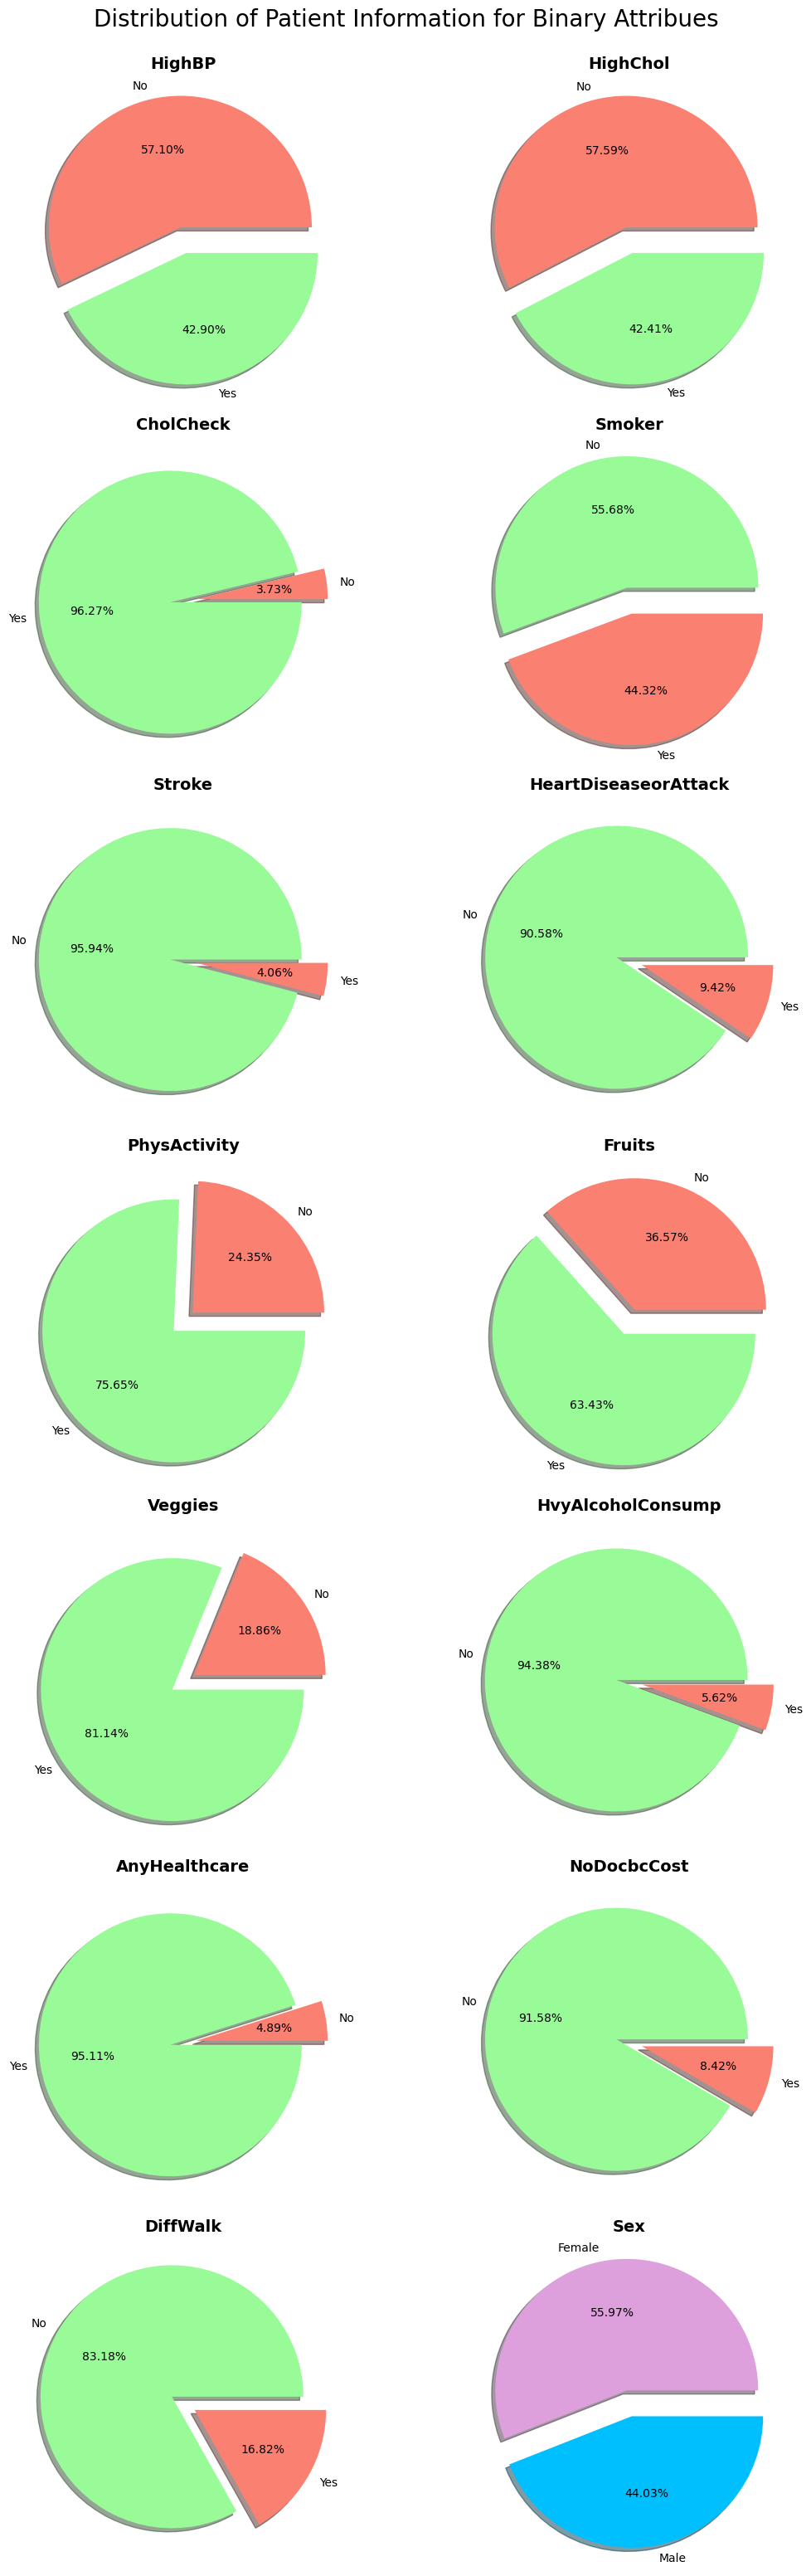

In [35]:
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 31))

#wedge_properties = {'linewidth': 1, 'edgecolor': "black"}

good_colors = ['salmon', 'palegreen']
bad_colors  = ['palegreen', 'salmon']

for col, ax in zip(binary_cols, axs.flat):
    grouped_v = X.groupby([col])[col].count().transform(lambda x: x / x.sum() * 100)

    label_val = grouped_v.index.map({0:'No',1:'Yes'})

    if col in ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'NoDocbcCost']:
        color_set = bad_colors
    elif col == 'Sex':
        color_set = ['plum', 'deepskyblue']
        label_val = grouped_v.index.map({0:'Female',1:'Male'})
    else:
        color_set = good_colors

    
    texts, autotexts, wedges = ax.pie(grouped_v,
                                      labels=label_val,
                                      #labeldistance=-0.2,
                                      shadow=True, explode=[0.1, 0.1],
                                      #colors = ['tomato', 'palegreen'],
                                      colors = color_set,
                                      startangle=0,
                                      #wedgeprops=wedge_properties,
                                      autopct='%1.2f%%',
                                    )
    ax.set_title(col, size=14, weight="bold", y=1, x = 0.5)

plt.suptitle('Distribution of Patient Information for Binary Attribues', fontsize=20, y=1)
plt.tight_layout()
plt.show()

#### GenHlth - Attribute rates the Patient's General Health from a scale of 1 to 5
Scale values are : 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor

In [36]:
# First, summarize the PhysActivity column and calculate the % of data split between the five values 
# (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)

grouped_v = X.groupby(['GenHlth'])['GenHlth'].count().transform(lambda x: x / x.sum() * 100)
grouped_v

GenHlth
1    17.856749
2    35.116682
3    29.819458
4    12.444812
5     4.762299
Name: GenHlth, dtype: float64

In [37]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor'}).to_list()
label_v

['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

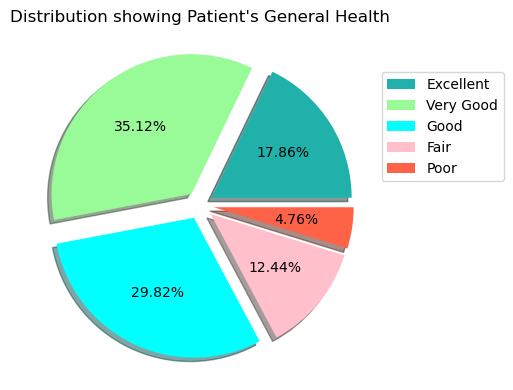

In [38]:
# Next is to visualizing the attribute if Patient is a Smoker

# Create a colormap for green shades
#green_cmap = plt.cm.Greens

# Create a colormap for red shades
#red_cmap = plt.cm.Reds

# Generate colors for each slice
#colors_v = [green_cmap(i) for i in np.linspace(0.8, 0.2, len(label_v))]

ax = grouped_v.plot(kind='pie', figsize=(12,4),
                  grid=False, ylabel='',
                  labels = label_v,
                  startangle=0,
                  colors = ['lightseagreen', 'palegreen', 'cyan', 'pink', 'tomato'],
                  #colors = plt.cm.Pastel2.colors,
                  shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.1],
                  legend=True, labeldistance=None,
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 0.9),loc='upper left')
plt.title('Distribution showing Patient\'s General Health')
plt.tight_layout()
plt.show()

#### Education - Attribute to show Patient's Education from a scale of 1 to 6
1 = Never attended school or only kindergarten \
2 = Grades 1 through 8 (Elementary) \
3 = Grades 9 through 11 (Some high school) \
4 = Grade 12 or GED (High school graduate) \
5 = College 1 year to 3 years (Some college or technical school) \
6 = College 4 years or more (College graduate)

In [39]:
# First, summarize the PhysActivity column and calculate the % of data split between the six values 
# see details above for scale 1-6

grouped_v = X.groupby(['Education'])['Education'].count()
grouped_v

Education
1       174
2      4043
3      9478
4     62750
5     69910
6    107325
Name: Education, dtype: int64

In [40]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'None or Kindergarten', 2:'Grades 1 - 8', 3:'Grades 9 - 11', 
                               4:'Grade 12 or GED', 5:'College 1-3 Years', 6 : 'College 4 or more Years'}).to_list()
label_v

['None or Kindergarten',
 'Grades 1 - 8',
 'Grades 9 - 11',
 'Grade 12 or GED',
 'College 1-3 Years',
 'College 4 or more Years']

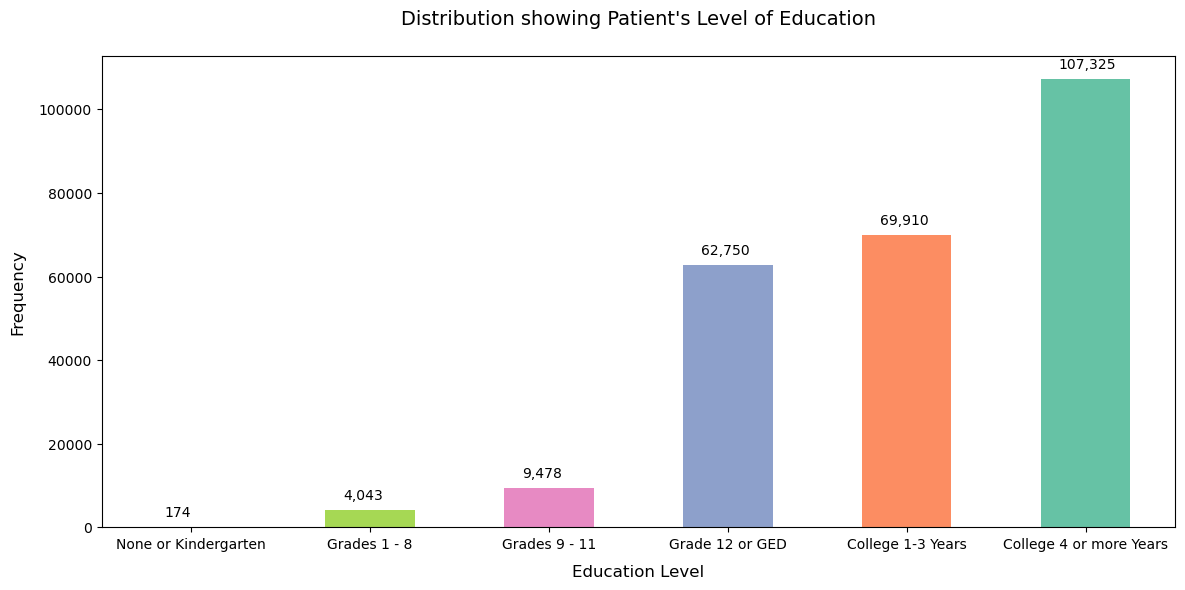

In [41]:
# Next is to visualizing the attribute if Patient is a Smoker

lv_len = len(label_v)

ax = grouped_v.plot(kind='bar', figsize=(12,6), color = plt.cm.Set2.colors[:lv_len][::-1])
plt.title('Distribution showing Patient\'s Level of Education', fontsize=14, y=1.05)
plt.xticks(range(lv_len),label_v, rotation = 0)
for index,data in enumerate(grouped_v):
    plt.text(x=index - .15 , y =data+2500 , s=f"{data:,}" , fontdict=dict(fontsize=10))
plt.xlabel('Education Level', labelpad=10, fontsize=12)
plt.ylabel('Frequency', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

#### Income - Attribute provides Patient's Income level from a scale of 1 to 8
1 = less than \\$10,000 \
2 = less than \\$15,000 \
3 = less than \\$20,000 \
4 = less than \\$25,000 \
5 = less than \\$35,000 \
6 = less than \\$50,000 \
7 = less than \\$75,000 \
8 = \$75,000 or more

Refer to Page 23 in this document for INCOME2 scale \
https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf (refer to page 23)

In [42]:
# First, summarize the PhysActivity column and calculate the % of data split between the six values 
# see details above for scale 1-6

grouped_v = X.groupby(['Income'])['Income'].count()
grouped_v

Income
1     9811
2    11783
3    15994
4    20135
5    25883
6    36470
7    43219
8    90385
Name: Income, dtype: int64

In [43]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'less than $10k', 2 : '10k to $15k', 3:'15k to $20k', 4:'20k to $25k',
                               5:'25k to $35k', 6 : '35k to $50k', 7:'50k to $75k', 8:'$75k or more', }).to_list()
label_v

['less than $10k',
 '10k to $15k',
 '15k to $20k',
 '20k to $25k',
 '25k to $35k',
 '35k to $50k',
 '50k to $75k',
 '$75k or more']

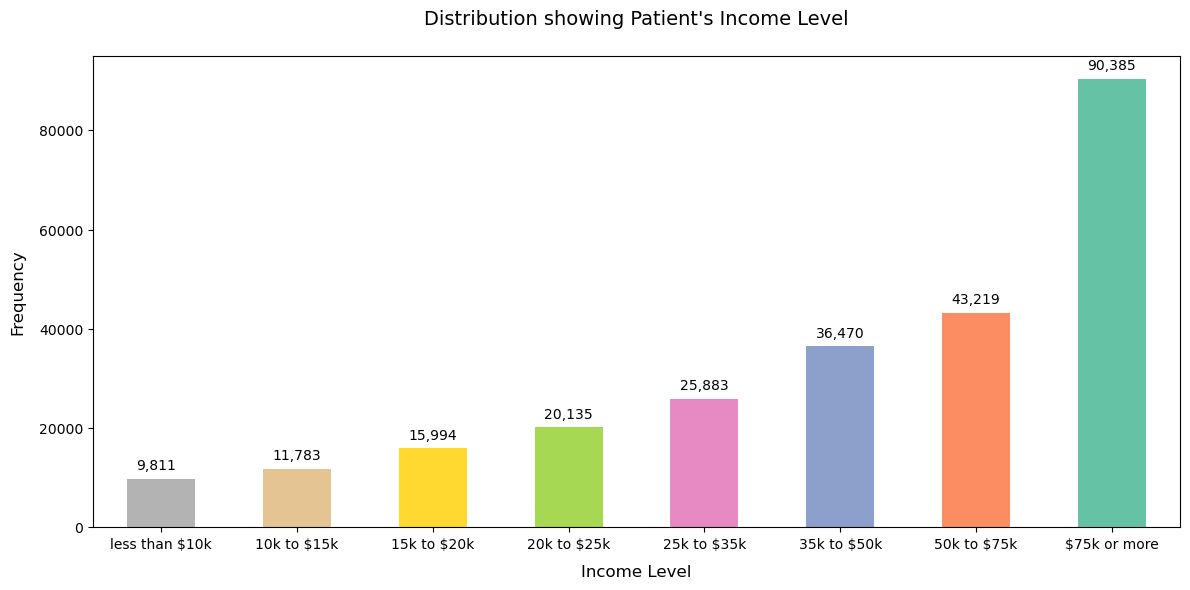

In [44]:
# Next is to visualizing the attribute if Patient is a Smoker

lv_len = len(label_v)

ax = grouped_v.plot(kind='bar', figsize=(12,6), color = plt.cm.Set2.colors[:lv_len][::-1])
plt.title('Distribution showing Patient\'s Income Level', fontsize=14, y=1.05)
plt.xticks(range(lv_len),label_v, rotation = 0)
for index,data in enumerate(grouped_v):
    plt.text(x=index - .18 , y =data+1800 , s=f"{data:,}" , fontdict=dict(fontsize=10))
plt.xlabel('Income Level', labelpad=10, fontsize=12)
plt.ylabel('Frequency', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

#### Age - Attribute provides Patient's Age level from a scale of 1 to 13
```
1  = Age 18 to 24       2 = Age 25 to 29      3  = Age 30 to 34       4 = Age 35 to 39 \
5  = Age 40 to 44       6 = Age 45 to 49      7  = Age 50 to 54       8 = Age 55 to 59 \
9  = Age 60 to 64      10 = Age 65 to 69     11  = Age 70 to 74      12 = Age 75 to 79 \
13 = Age 80 or older
```
Refer to Page 101 in this document for _AGEG5YR scale \
https://www.cdc.gov/brfss/annual_data/2014/pdf/CODEBOOK14_LLCP.pdf \

In [45]:
# First, summarize the PhysActivity column and calculate the % of data split between the six values 
# see details above for scale 1-6

grouped_v = X.groupby(['Age'])['Age'].count()
grouped_v

Age
1      5700
2      7598
3     11123
4     13823
5     16157
6     19819
7     26314
8     30832
9     33244
10    32194
11    23533
12    15980
13    17363
Name: Age, dtype: int64

In [46]:
# Convert the Index values into meaningful values
label_v = grouped_v.index.map({1:'Age 18 to 24',  2 : 'Age 25 to 29',  3:'Age 30 to 34',  4:'Age 35 to 39',
                               5:'Age 40 to 44',  6 : 'Age 45 to 49',  7:'Age 50 to 54',  8:'Age 55 to 59', 
                               9:'Age 60 to 64', 10 : 'Age 65 to 69', 11:'Age 70 to 74', 12:'Age 75 to 79', 13:'Age 80 or older',
                              }).to_list()
label_v

['Age 18 to 24',
 'Age 25 to 29',
 'Age 30 to 34',
 'Age 35 to 39',
 'Age 40 to 44',
 'Age 45 to 49',
 'Age 50 to 54',
 'Age 55 to 59',
 'Age 60 to 64',
 'Age 65 to 69',
 'Age 70 to 74',
 'Age 75 to 79',
 'Age 80 or older']

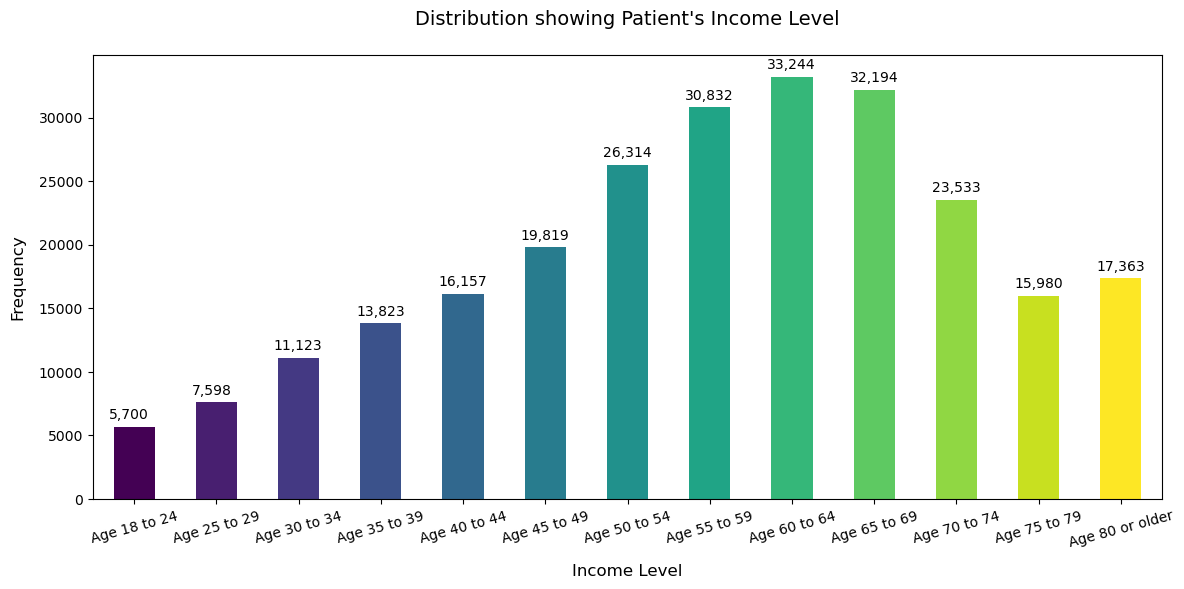

In [47]:
# Next is to visualizing the attribute if Patient is a Smoker

lv_len = len(label_v)

color_scheme = plt.cm.viridis(np.linspace(0, 1, lv_len))

ax = grouped_v.plot(kind='bar', figsize=(12,6), 
                    color = color_scheme,
                    #color = plt.cm.tab20c.colors[:lv_len]
                   )
plt.title('Distribution showing Patient\'s Income Level', fontsize=14, y=1.05)
plt.xticks(range(lv_len),label_v, rotation = 15)
for index,data in enumerate(grouped_v):
    plt.text(x=index - .3 , y =data+600 , s=f"{data:,}" , fontdict=dict(fontsize=10))
plt.xlabel('Income Level', labelpad=10, fontsize=12)
plt.ylabel('Frequency', labelpad=10, fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
df_original = pd.DataFrame(cdc_diabetes_health_indicators.data.original)
df_original.drop('ID', axis = 1, inplace=True)
df_original.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)
df_original

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [49]:
income_labels = ['less than $10k', '10k to $15k', '15k to $20k', '20k to $25k',
                 '25k to $35k',    '35k to $50k', '50k to $75k', '$75k or more']

age_labels = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
              'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 
              'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

edu_labels = ['None or Kindergarten', 'Grades 1 - 8',      'Grades 9 - 11', 
              'Grade 12 or GED',      'College 1-3 Years', 'College 4 or more Years']

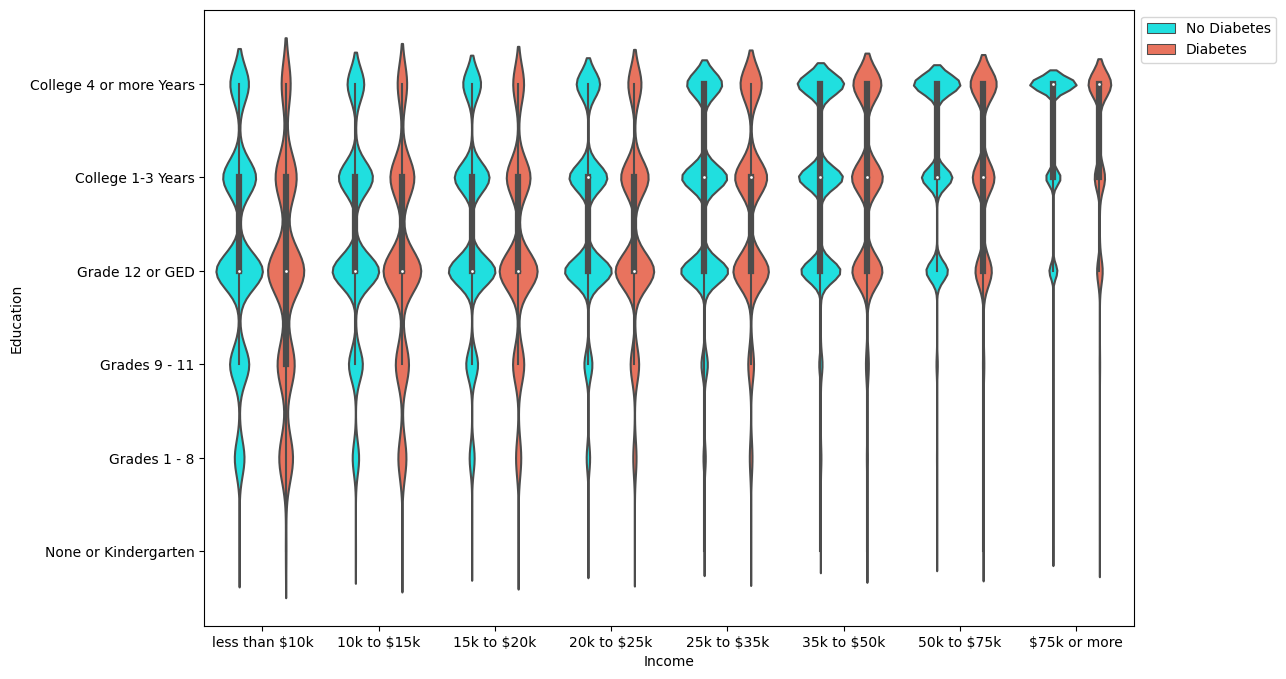

In [50]:
# Let's display to the violin plot for Income and Education against target values - Diabetes

fig = plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=df_original, x='Income', y='Education', hue='Diabetes', palette={0:'cyan', 1:'tomato'})

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])


plt.xticks(range(len(income_labels)), income_labels)
plt.yticks(range(1, len(edu_labels)+1), edu_labels)

plt.show()

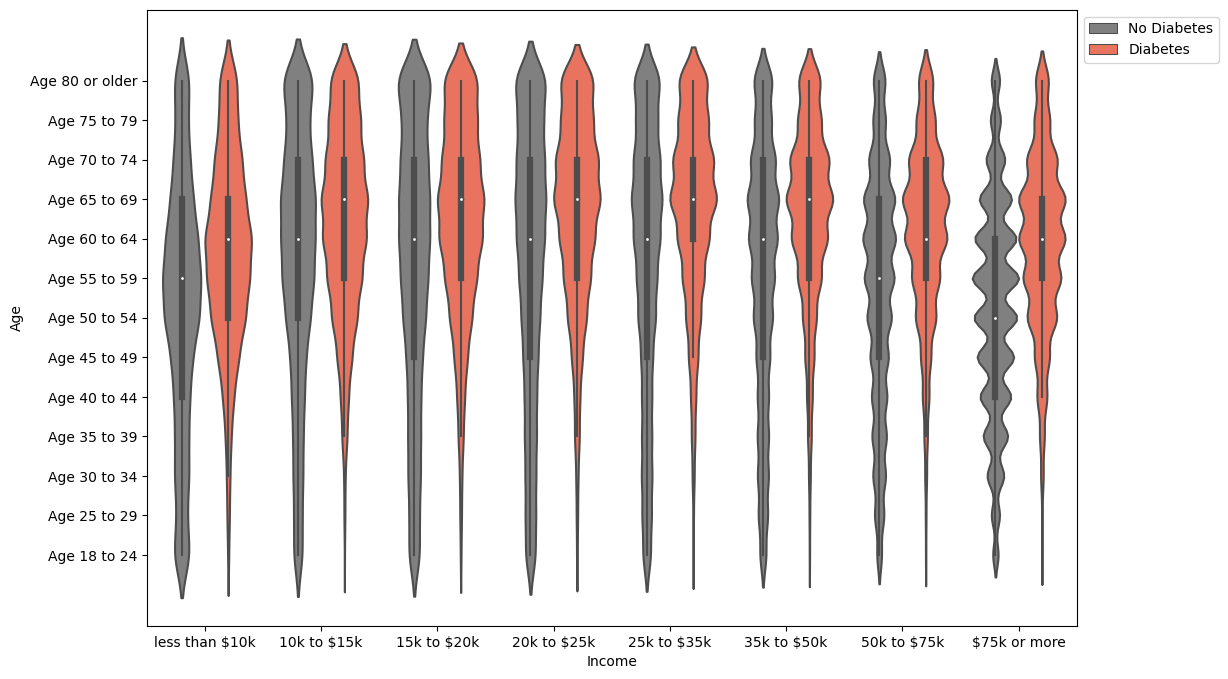

In [51]:
# Let's display to the violin plot for Income and Age against target values - Diabetes

fig = plt.figure(figsize=(12, 8))

ax = sns.violinplot(data=df_original, x='Income', y='Age', hue='Diabetes', palette=['grey','tomato'])

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])

plt.xticks(range(len(income_labels)), income_labels)
plt.yticks(range(1, len(age_labels)+1), age_labels)

plt.show()

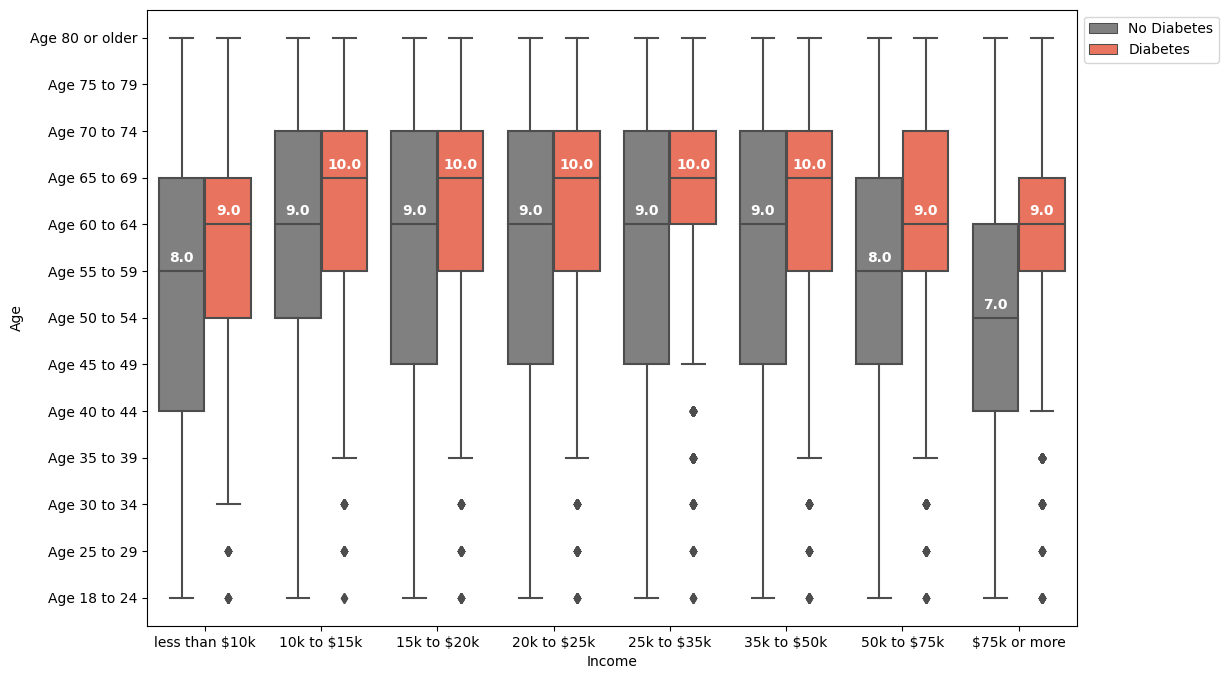

In [56]:
# Let's display to the Box plot for Income and Age against target values - Diabetes

fig = plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df_original, x='Income', y='Age', hue='Diabetes', palette=['grey','tomato'])

ax.legend(bbox_to_anchor=(1, 1),loc='upper left', handles=ax.legend_.legendHandles, labels = ['No Diabetes', 'Diabetes'])
medians = df_original.groupby(['Income', 'Diabetes'])['Age'].median().values

ind = 0

for tick in range(len(ax.get_xticklabels())):
    #left side value is medians_label[ind]; median + 0.2 is to move the value up; tick - 0.2 is to shift left from center
    ax.text(tick-.2, medians[ind] + 0.2, medians[ind], horizontalalignment='center', color='w', weight='semibold')

    #right side value is medians_label[ind+1]; median + 0.2 is to move the value up; tick + 0.2 is to shift right from center
    ax.text(tick+.2, medians[ind+1] + 0.2, medians[ind+1],  horizontalalignment='center',  color='w', weight='semibold')

    ind += 2 # to move the medians list by 2 as we have two values for each income group

plt.xticks(range(len(income_labels)), income_labels)
plt.yticks(range(1, len(age_labels)+1), age_labels)

plt.show()

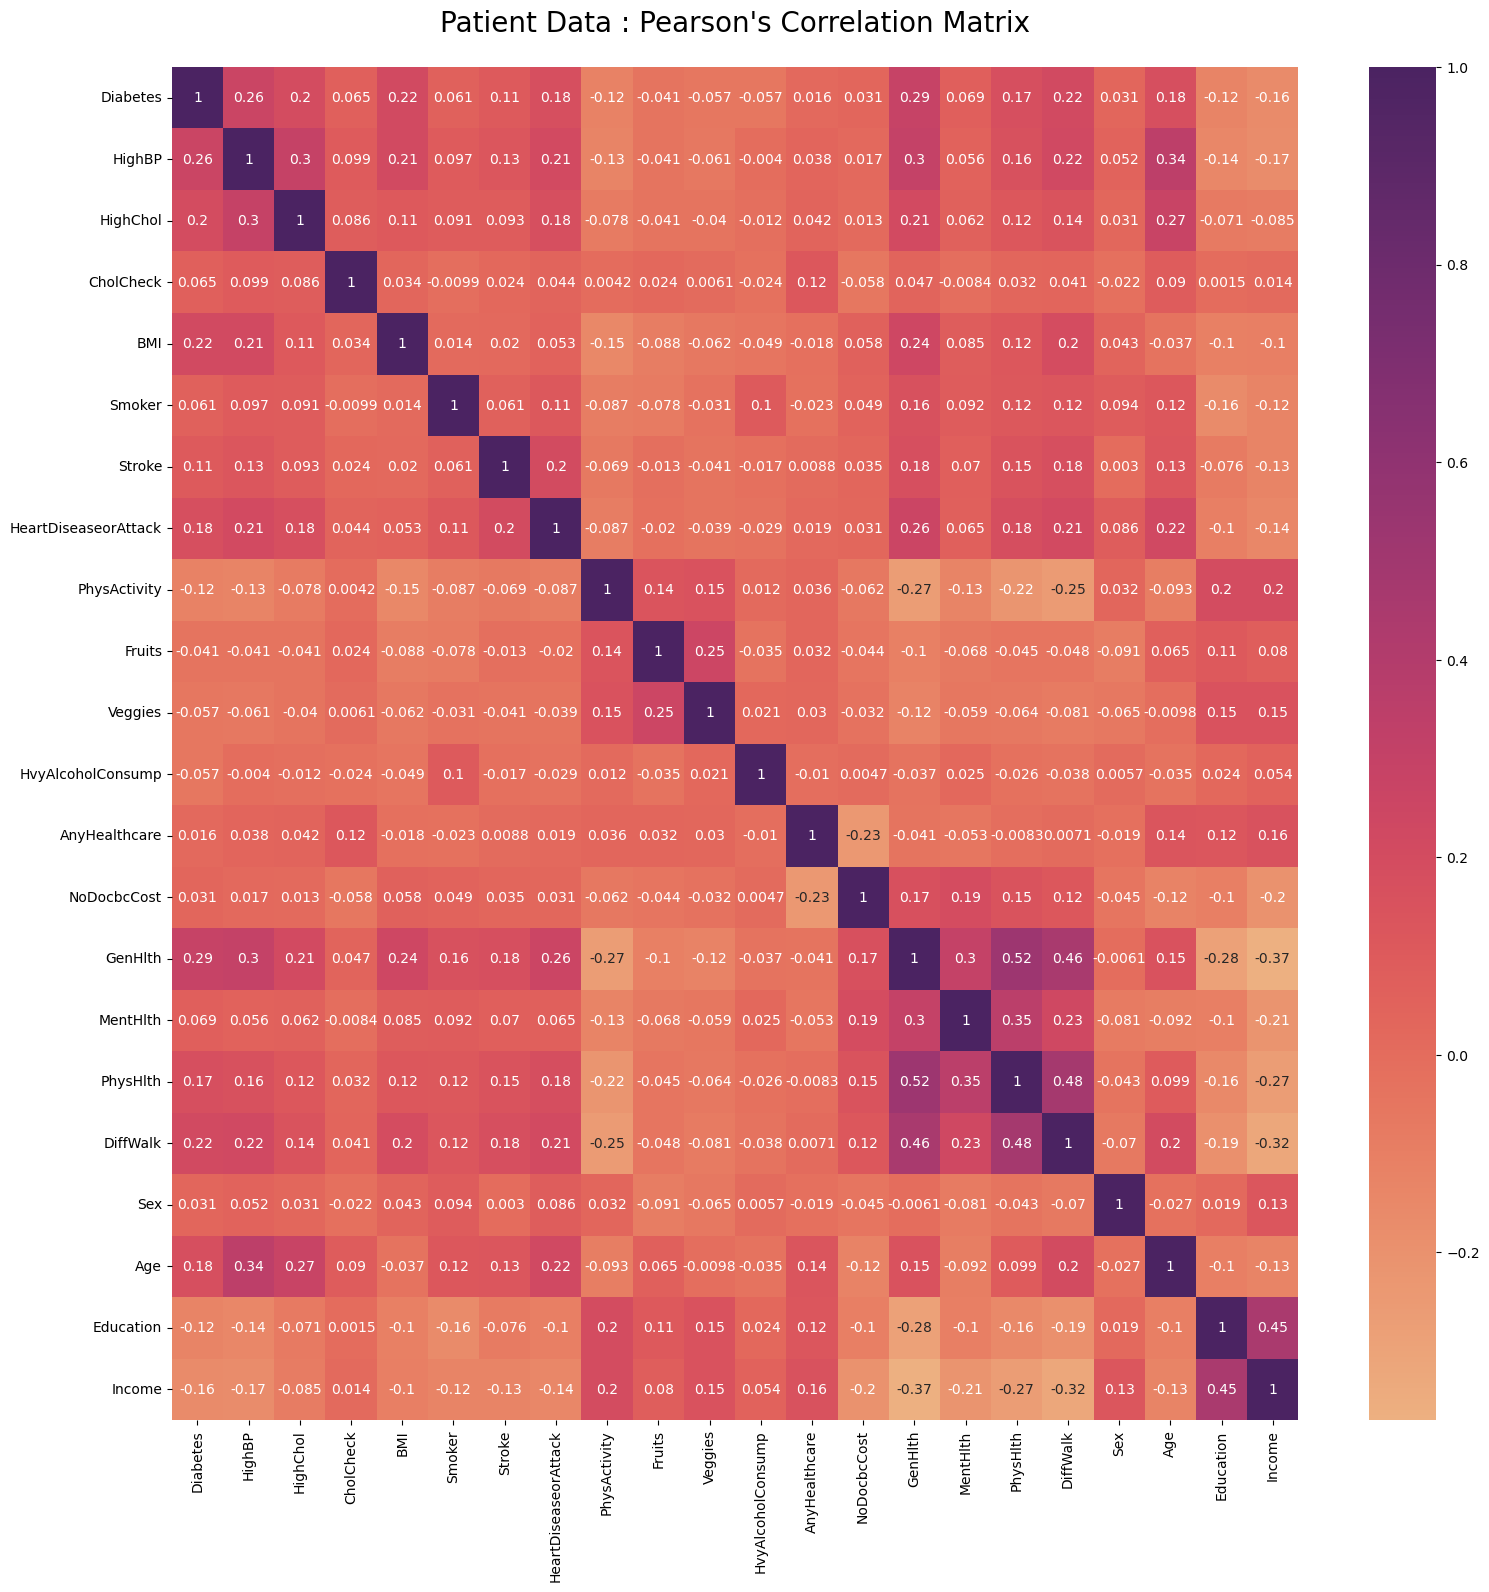

In [53]:
# Let's create a HeatMap to correlate all the numerical datasets

plt.figure(figsize=(16,16))
corr = df_original.corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Patient Data : Pearson\'s Correlation Matrix', fontsize = 20, y=1.02)
plt.tight_layout()
plt.show()

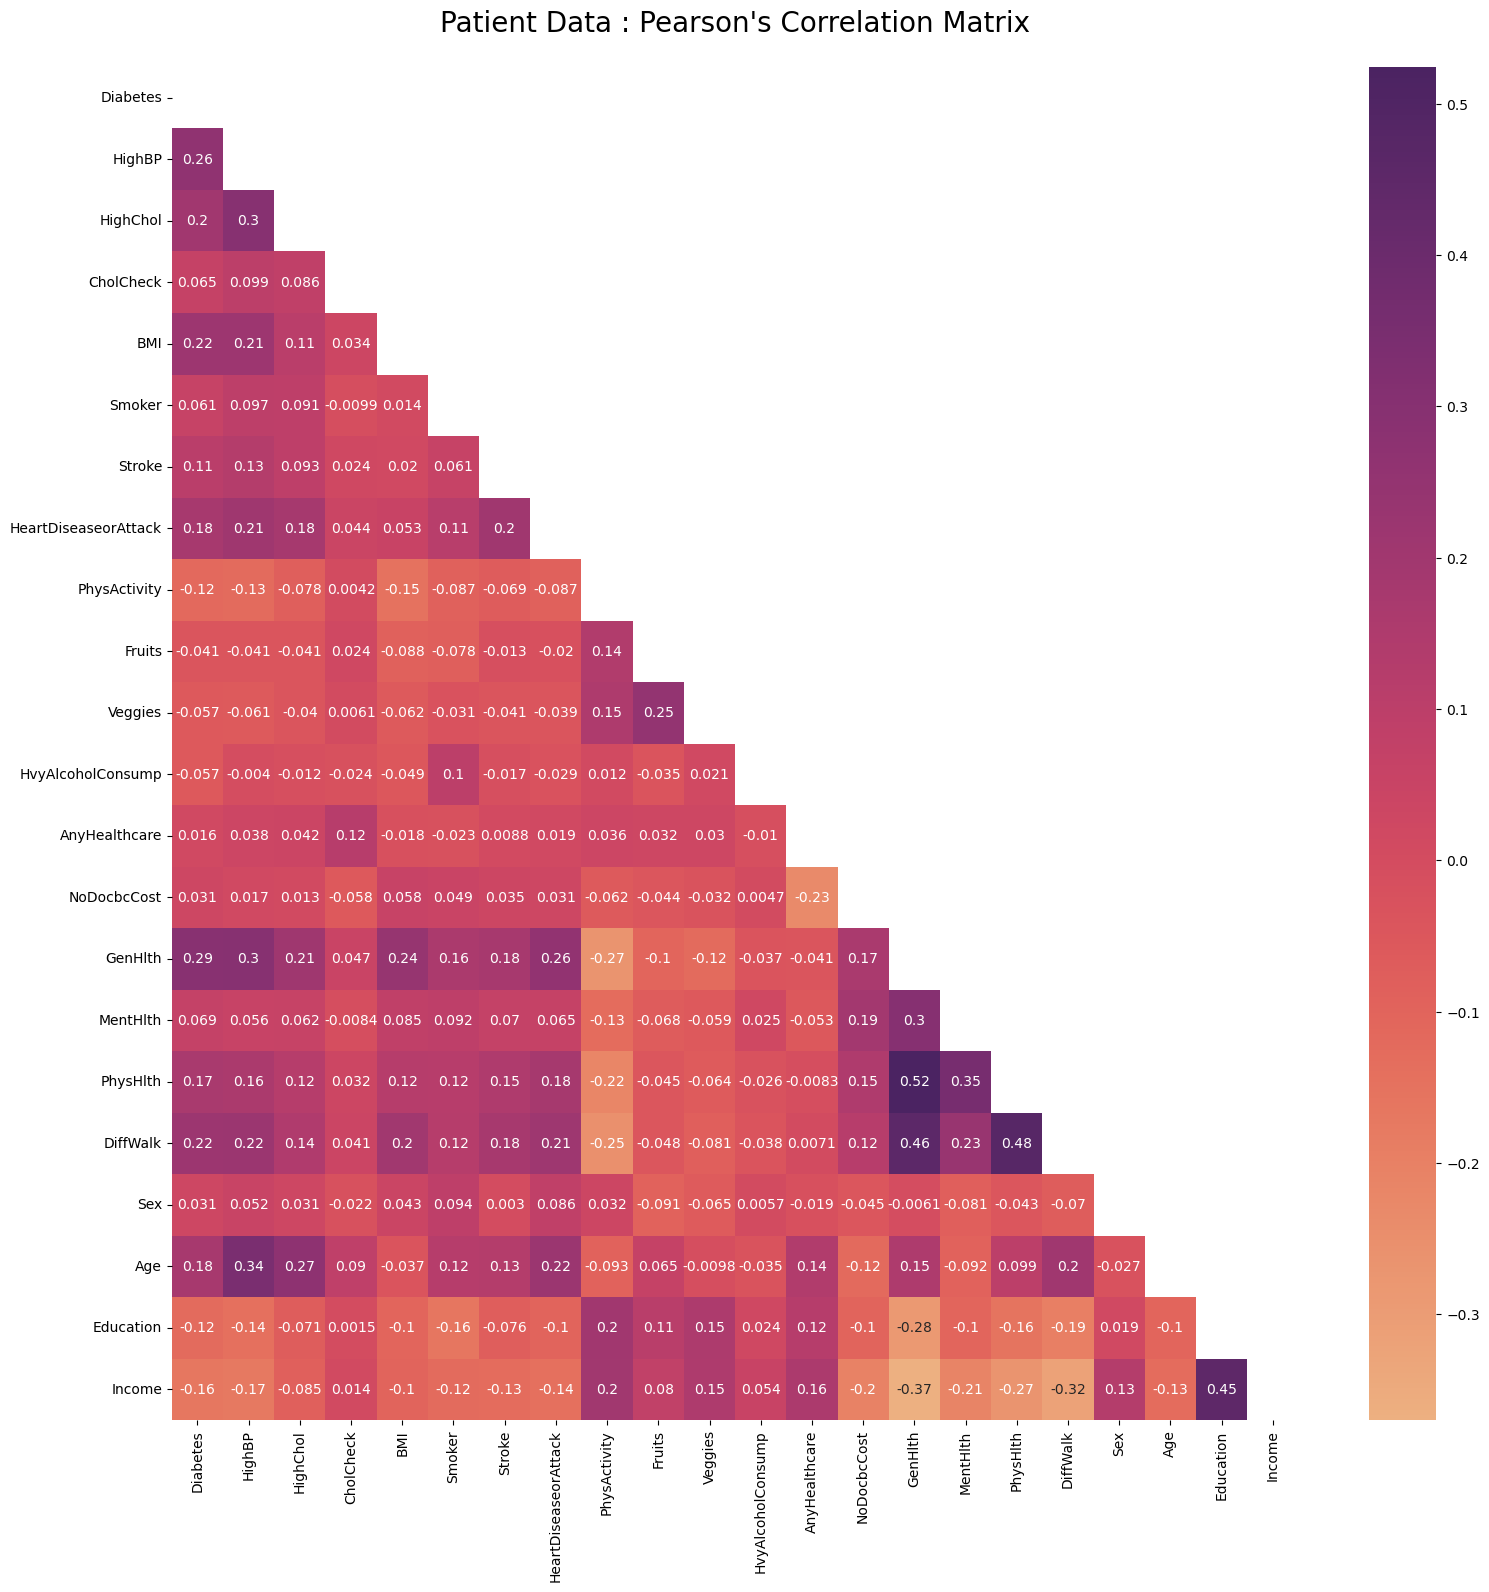

In [54]:
# Let's create a HeatMap to correlate all the numerical datasets

plt.figure(figsize=(16,16))
corr = df_original.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = matrix, cmap='flare')
plt.title('Patient Data : Pearson\'s Correlation Matrix', fontsize = 20, y=1.02)
plt.tight_layout()
plt.show()